In [1]:
import mglearn
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

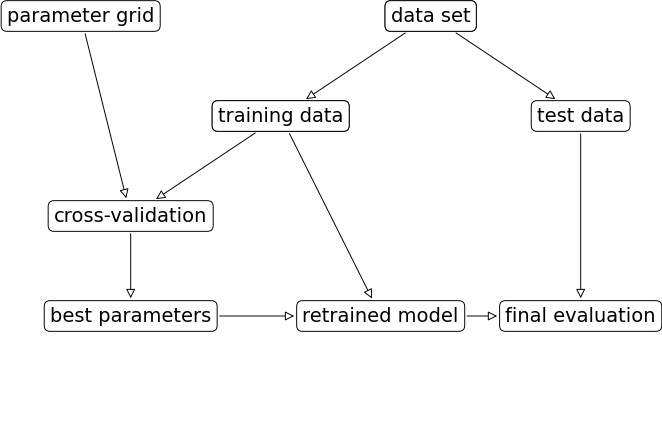

In [17]:
mglearn.plots.plot_grid_search_overview()

In [6]:
dat = pd.read_csv("/courses/EDS232/Data/demo-spotify.csv")

For GridSearchCV we need an instantiated model and parameter grid

The method considers product of the sets and evaluates each combination one by one.

The standard preparation:

In [8]:
# Define features and target
X = dat.drop(columns=['genre'])
y = dat['genre']

# Check for non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object']).columns

# Drop non-numeric columns
X = X.drop(columns=non_numeric_cols)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=808)

rf = RandomForestClassifier()

Now we will construct our parameter grid

In [18]:
param_grid = {
    "n_estimators": [10, 50, 100, 200], # number of trees
    "max_depth": [5,10,20, None],
    "max_features": ["sqrt", 9, None], # M_try: number of features model is going to try; random forest only uses subsets of features in each tree
}
# how many models? with all the hyperparameters 4*4*3=48, gs is grid search
gs = GridSearchCV(rf, param_grid = param_grid, n_jobs=-1, return_train_score = True) # number of job, -1 use all the available course???

The GridSearchCV object above behaves like a classifier. We can call fit, predict or score on it.

In [20]:
# Carry out the search 

gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, None],
                         'max_features': ['sqrt', 9, None],
                         'n_estimators': [10, 50, 100, 200]},
             return_train_score=True)

In [21]:
# Get the best hyperparameter values
gs.best_params_

{'max_depth': None, 'max_features': 9, 'n_estimators': 200}

It is often helpful to visualize results of all cross-validation experiments.
You can access this information using cv_results_ attribute of a fitted GridSearchCV object.

In [22]:
results = pd.DataFrame(gs.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.214416,0.019715,0.014973,0.000309,5,sqrt,10,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",0.873167,0.877768,...,0.872921,0.004422,48,0.885229,0.884366,0.885589,0.884447,0.885094,0.884945,0.000469
1,1.087761,0.143646,0.042906,0.024890,5,sqrt,50,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",0.877768,0.884095,...,0.881263,0.002655,44,0.887818,0.888393,0.888034,0.887754,0.890415,0.888483,0.000991
2,1.978632,0.081706,0.047206,0.001360,5,sqrt,100,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",0.879206,0.883808,...,0.880515,0.001943,45,0.887746,0.890191,0.889472,0.889408,0.889336,0.889231,0.000803
3,3.985446,0.188677,0.082652,0.002048,5,sqrt,200,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",0.883233,0.883520,...,0.882011,0.002700,41,0.889544,0.889113,0.889616,0.890199,0.889696,0.889634,0.000347
4,0.420594,0.012010,0.015149,0.000306,5,9,10,"{'max_depth': 5, 'max_features': 9, 'n_estimat...",0.877768,0.881795,...,0.879365,0.002944,46,0.890047,0.890191,0.889256,0.890199,0.886172,0.889173,0.001540
5,2.000935,0.096113,0.031174,0.001572,5,9,50,"{'max_depth': 5, 'max_features': 9, 'n_estimat...",0.879781,0.882370,...,0.881839,0.002936,43,0.892708,0.895657,0.892636,0.894585,0.894514,0.894020,0.001173
6,3.906347,0.095725,0.048188,0.002618,5,9,100,"{'max_depth': 5, 'max_features': 9, 'n_estimat...",0.883808,0.885821,...,0.884715,0.002296,38,0.894866,0.896591,0.891989,0.895233,0.893579,0.894451,0.001561
7,10.254514,1.142142,0.161061,0.047851,5,9,200,"{'max_depth': 5, 'max_features': 9, 'n_estimat...",0.883808,0.884383,...,0.884773,0.001910,37,0.895369,0.894722,0.893859,0.894945,0.895305,0.894840,0.000545
8,0.768391,0.016721,0.016346,0.001078,5,None,10,"{'max_depth': 5, 'max_features': None, 'n_esti...",0.878343,0.870290,...,0.878099,0.005965,47,0.886811,0.884870,0.892205,0.890055,0.888833,0.888555,0.002540
9,3.782402,0.082450,0.030543,0.001383,5,None,50,"{'max_depth': 5, 'max_features': None, 'n_esti...",0.874317,0.880644,...,0.881897,0.004776,42,0.889328,0.894866,0.889904,0.894226,0.895808,0.892826,0.002675


Let's look at only the most relevant rows

In [ ]:
# Select relevant columns
filtered_results = pd.DataFrame(gs.cv_results_)[
    [
        "mean_test_score",
        "param_n_estimators",   # Number of trees
        "param_max_depth",      # Max depth of trees
        "param_max_features",   # Feature selection per split
        "mean_fit_time",        # Time taken to fit the model
        "rank_test_score",      # Rank of the best score
    ]
].set_index("rank_test_score").sort_index().T

Other than searching for best hyperparameter values, GridSearchCV also fits a new model on the whole training set with the parameters that yielded the best results.
So we can conveniently call score on the test set with a fitted GridSearchCV object.

In [ ]:
# Best score

# Get the test scores 


Why are best_score_ and the score above different?



Visualizing parameters as heat 

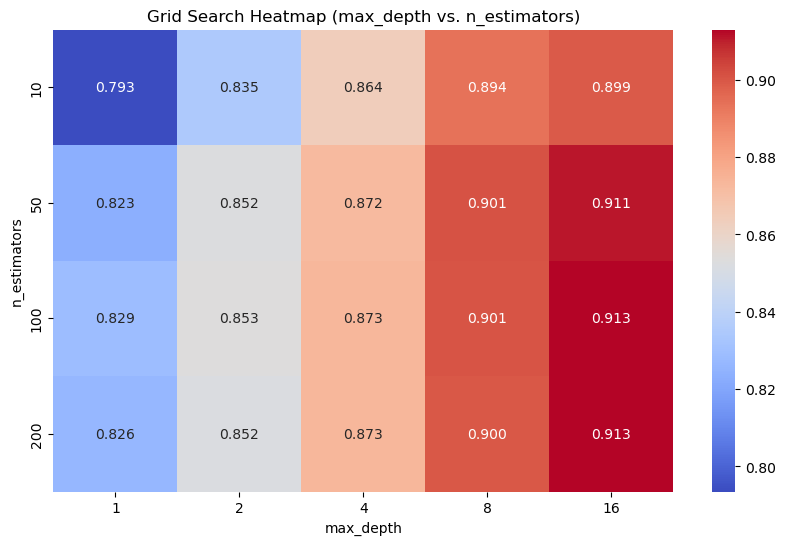

In [16]:
def display_heatmap(param_grid, model, X_train, y_train):
   
    grid_search = GridSearchCV(
        model, param_grid, cv=5, n_jobs=-1, return_train_score=True, scoring="accuracy"
    )
    
    # Fit the model
    grid_search.fit(X_train, y_train)
    
    # Convert results to DataFrame
    results = pd.DataFrame(grid_search.cv_results_)

    # Extract parameter names dynamically
    param_x, param_y = list(param_grid.keys())

    # Reshape test scores into a 2D array for heatmap
    scores = results.pivot(index=f"param_{param_y}", columns=f"param_{param_x}", values="mean_test_score")

    # Plot the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(scores, annot=True, fmt=".3f", cmap="coolwarm")
    plt.xlabel(param_x)
    plt.ylabel(param_y)
    plt.title(f"Grid Search Heatmap ({param_x} vs. {param_y})")
    plt.show()

# Define the hyperparameter grid for max_depth vs. n_estimators
param_grid1 = {
    "max_depth": [1,2,4,8,16],
    "n_estimators": [10,50,100,200]
}


# Call the function
display_heatmap(param_grid1, rf, X_train, y_train)

A key problem with exhaustive grid search is the required number of models to evaluate grows exponentially with the dimensionally of the configuration space.

For future discussion:
sklearn.model_selection.RandomizedSearchCV
Samples configurations at random until certain budget (e.g., time) is exhausted.